In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [3]:
cdfx = pd.read_csv("./catapult_tempmatch_latency.csv", index_col=0)
vdfx = pd.read_csv("./catapult_tempmatch_area.csv", index_col=0)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = vdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = vdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
#cdfx['mem_partition_size1'] = cdfx['knob_array_part1']
#vdfx['mem_partition_size1'] = pd.to_numeric(512/(vdfx['knob_array_partition1']), downcast='integer')
#cdfx['mem_partition_size2'] = cdfx['knob_array_part2']
#vdfx['mem_partition_size2'] = pd.to_numeric(vdfx['knob_UNROLL_F']/(vdfx['knob_array_partition2']), downcast='integer')
# dropping columns
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['tmpsize'])
cdfx = cdfx.drop(columns=['size'])
vdfx = vdfx.drop(columns=['knob_I_B'])
vdfx = vdfx.drop(columns=['tmpsize'])
vdfx = vdfx.drop(columns=['size'])
#vdfx = vdfx.drop(columns=['knob_array_partition1'])
#vdfx = vdfx.drop(columns=['knob_array_partition2'])

In [4]:
print(cdfx.count())
cdfx.head()

knob_tmpdim           9215
knob_indim            9215
knob_UNROLL_FACTOR    9215
knob_UNROLL_LOOP1     9215
knob_UNROLL_LOOP2     9215
knob_UNROLL_LOOP3     9215
knob_UNROLL_LOOP4     9215
obj1                  9215
obj2                  9215
lut                   9215
ff                    9215
dsp                   9215
bram                  9215
throughput            9215
ff_inv                9215
lut_inv               9215
1/obj2                9215
clbUtil               9215
dtype: int64


,knob_tmpdim,knob_indim,knob_UNROLL_FACTOR,knob_UNROLL_LOOP1,knob_UNROLL_LOOP2,knob_UNROLL_LOOP3,knob_UNROLL_LOOP4,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil
n,,,,,,,,,,,,,,,,,,
0,5,100,1,1,1,1,1,1.8395,152,838,204,0,10,0.184235,0.004902,0.001193,0.506579,0.001029
1,5,100,1,1,1,1,2,1.5304,182,871,208,0,10,0.221445,0.004808,0.001148,0.423077,0.001232
2,5,100,1,1,1,1,3,1.7192,173,895,212,0,10,0.197127,0.004717,0.001117,0.445087,0.001171
3,5,100,1,1,1,1,4,2.0371,188,851,213,0,10,0.166364,0.004695,0.001175,0.409574,0.001272
4,5,100,1,1,1,2,1,1.6981,158,860,190,0,10,0.199576,0.005263,0.001163,0.487342,0.001069


In [5]:
print(vdfx.count())
vdfx.head()

knob_tmpdim           9150
knob_indim            9150
knob_UNROLL_FACTOR    9150
knob_UNROLL_LOOP1     9150
knob_UNROLL_LOOP2     9150
knob_UNROLL_LOOP3     9150
knob_UNROLL_LOOP4     9150
obj1                  9150
obj2                  9150
lut                   9150
ff                    9150
dsp                   9150
bram                  9150
throughput            9150
ff_inv                9150
lut_inv               9150
1/obj2                9150
clbUtil               9150
dtype: int64


,knob_tmpdim,knob_indim,knob_UNROLL_FACTOR,knob_UNROLL_LOOP1,knob_UNROLL_LOOP2,knob_UNROLL_LOOP3,knob_UNROLL_LOOP4,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil
n,,,,,,,,,,,,,,,,,,
0,5,100,1,1,1,1,1,1.839540,152,838,204,0,10,0.184231,0.004902,0.001193,0.506579,0.001029
1,5,100,1,1,1,1,2,1.530371,182,871,208,0,10,0.221450,0.004808,0.001148,0.423077,0.001232
2,5,100,1,1,1,1,3,1.719198,173,895,212,0,10,0.197127,0.004717,0.001117,0.445087,0.001171
4,5,100,1,1,1,2,1,1.698066,158,860,190,0,10,0.199580,0.005263,0.001163,0.487342,0.001069
5,5,100,1,1,1,2,2,1.904256,165,862,210,0,10,0.177970,0.004762,0.001160,0.466667,0.001117


Text(0.5, 1.0, 'Catapult Template Matching Results')

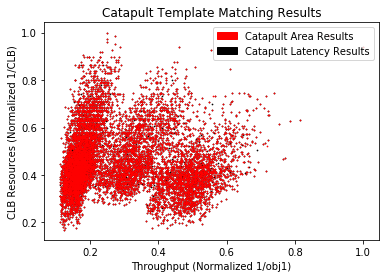

In [10]:
ax1 = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='black', s=0.5)
ax = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r', ax=ax1, s=0.5)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Catapult Area Results')
green_data = mpatches.Patch(color='black', label='Catapult Latency Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Catapult Template Matching Results")

Text(0, 0.5, 'Normalized 1/CLB (1/obj2)')

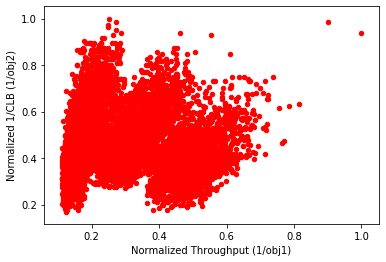

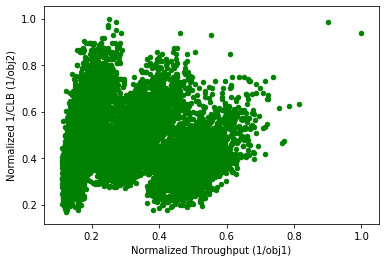

In [11]:
ax1 = vdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='r')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
ax = cdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='g')
#ax1.set_ylim(0,0.001)
#ax1.set_xlim(0,1)
#ax.set_ylim(0.2, 0.6)
#ax.set_xlim(0,0.0000004)
#red_data = mpatches.Patch(color='green', label='Vivado Results')
#green_data = mpatches.Patch(color='red', label='Catapult Results')
#plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')

In [12]:
print("~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~

knob_tmpdim            11.665762
knob_indim            233.347802
knob_UNROLL_FACTOR      2.499837
knob_UNROLL_LOOP1       2.500163
knob_UNROLL_LOOP2       2.499837
knob_UNROLL_LOOP3       2.500054
knob_UNROLL_LOOP4       2.499946
obj1                    1.441456
obj2                  179.540315
lut                   993.238416
ff                    233.331308
dsp                     0.000000
bram                    6.000326
throughput              0.295287
ff_inv                  0.004397
lut_inv                 0.001096
1/obj2                  0.463265
clbUtil                 0.001215
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~

knob_tmpdim            11.659016
knob_indim            233.420765
knob_UNROLL_FACTOR      2.499781
knob_UNROLL_LOOP1       2.499781
knob_UNROLL_LOOP2       2.500437
knob_UNROLL_LOOP3       2.500546
knob_UNROLL_LOOP4       2.499781
obj1                    1.4413

In [13]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, 
                 on=
                 [
                    'knob_tmpdim',
                    'knob_indim',        
                    'knob_UNROLL_FACTOR',
                    'knob_UNROLL_LOOP1', 
                    'knob_UNROLL_LOOP2', 
                    'knob_UNROLL_LOOP3', 
                    'knob_UNROLL_LOOP4' 
                 ], how='inner')
cv_df.count()

knob_tmpdim           9149
knob_indim            9149
knob_UNROLL_FACTOR    9149
knob_UNROLL_LOOP1     9149
knob_UNROLL_LOOP2     9149
knob_UNROLL_LOOP3     9149
knob_UNROLL_LOOP4     9149
obj1_x                9149
obj2_x                9149
lut_x                 9149
ff_x                  9149
dsp_x                 9149
bram_x                9149
throughput_x          9149
ff_inv_x              9149
lut_inv_x             9149
1/obj2_x              9149
clbUtil_x             9149
obj1_y                9149
obj2_y                9149
lut_y                 9149
ff_y                  9149
dsp_y                 9149
bram_y                9149
throughput_y          9149
ff_inv_y              9149
lut_inv_y             9149
1/obj2_y              9149
clbUtil_y             9149
dtype: int64

(0, 1)

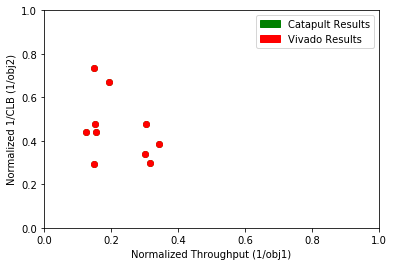

In [15]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

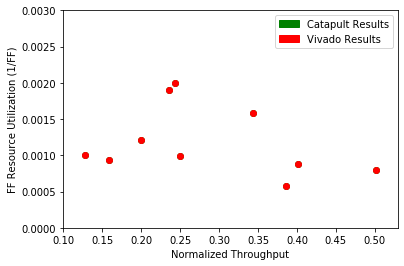

In [16]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)